# Clustering - Mini-Project 3

***Edit this cell with your name(s), tutorial number and ID(s)***

---

Name: Jana Bassem

ID: 58-19575

Tutorial: 11

---

Name: Nada Ahmed

ID: 58-9887

Tutorial: 11



## Dataset Description

The dataset file contains almost ~3000 different music genres aggregated from more than 160.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)


Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)


**Recommended Reading for Data Understanding**: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**Acknowledgment**: This dataset was created and published by Yamaç Eren Ay on Kaggle.

## Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/music_genres.csv')
df.head(30)

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
4,abstract,0.459210,0.516167,3.431965e+05,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1
5,abstract beats,0.342147,0.623000,2.299362e+05,0.527800,0.333603,0.099653,-7.918000,0.116373,112.413800,0.493507,58.933333,10
6,abstract hip hop,0.243854,0.694571,2.318492e+05,0.646235,0.024231,0.168543,-7.349328,0.214258,108.244987,0.571391,39.790702,2
7,accordeon,0.323000,0.588000,1.640000e+05,0.392000,0.441000,0.079400,-14.899000,0.072700,109.131000,0.709000,39.000000,2
8,accordion,0.446125,0.624812,1.670616e+05,0.373437,0.193738,0.160300,-14.487063,0.078537,112.872438,0.658687,21.937500,2
9,acid house,0.067951,0.677400,2.971881e+05,0.724403,0.385891,0.233488,-9.381200,0.055855,126.492092,0.567677,46.638462,7


## Data Inspection


In [3]:
df.info()     #Displays dataset details including column names, data types, and count of non null values
df.isnull().sum()          #Shows the number of missing values in every column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            2972 non-null   object 
 1   acousticness      2972 non-null   float64
 2   danceability      2972 non-null   float64
 3   duration_ms       2972 non-null   float64
 4   energy            2972 non-null   float64
 5   instrumentalness  2972 non-null   float64
 6   liveness          2972 non-null   float64
 7   loudness          2972 non-null   float64
 8   speechiness       2972 non-null   float64
 9   tempo             2972 non-null   float64
 10  valence           2972 non-null   float64
 11  popularity        2972 non-null   float64
 12  key               2972 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 302.0+ KB


,0
genres,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
liveness,0
loudness,0
speechiness,0
tempo,0


In [4]:
df.describe()  #shows summary statistics like count , mean , std and more for numerical columns

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,2972.000000,2972.000000,2.972000e+03,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000
mean,0.401157,0.537190,2.517272e+05,0.561190,0.211368,0.192791,-10.509249,0.083580,119.020796,0.492741,39.925598,5.938425
std,0.319781,0.150693,9.467215e+04,0.234511,0.267374,0.092370,5.370006,0.080495,17.471762,0.201853,16.747890,3.368621
min,0.000003,0.056900,3.094600e+04,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000
25%,0.119036,0.441169,2.063674e+05,0.395030,0.004829,0.137682,-12.428814,0.044900,109.191107,0.348558,32.531911,3.000000
50%,0.321706,0.546511,2.375479e+05,0.601264,0.080663,0.178752,-9.219409,0.059432,119.199333,0.499936,43.059365,7.000000
75%,0.674088,0.647536,2.773008e+05,0.730202,0.343333,0.220858,-6.919969,0.091000,127.510813,0.640380,51.139881,9.000000
max,0.996000,0.929000,2.382587e+06,0.994667,0.992000,0.960000,0.060000,0.946219,204.212000,0.980000,80.666667,11.000000


In [5]:
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")
df.info()
df.isnull().sum()

  #show unique values in every atribute

genres : ['21st century classical' '432hz' '8-bit' ... 'zouk' 'zurich indie'
 'zydeco']
acousticness : [0.97933333 0.49478    0.762      ... 0.161      0.26326111 0.42103849]
danceability : [0.16288333 0.29933333 0.712      ... 0.74888889 0.70566667 0.62940873]
duration_ms : [ 160297.66666667 1048887.33333333  115177.         ...  306072.77777778
  198417.33333333  171671.69047619]
energy : [0.07131667 0.45067833 0.818      ... 0.62244444 0.17266667 0.60936905]
instrumentalness : [0.60683367 0.47776167 0.876      ... 0.257227   0.46863333 0.01924763]
liveness : [0.3616     0.131      0.126      ... 0.08967778 0.17966667 0.25587659]
loudness : [-31.51433333 -16.854       -9.18       ... -10.28922222 -11.45333333
  -9.8548254 ]
speechiness : [0.04056667 0.07681667 0.047      ... 0.03877778 0.34866667 0.05049127]
tempo : [ 75.3365     120.28566667 133.444      ... 101.96522222  91.278
 126.3660873 ]
valence : [0.10378333 0.22175    0.975      ... 0.845      0.82411111 0.80854365]
populari

,0
genres,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
liveness,0
loudness,0
speechiness,0
tempo,0


## Exploratory Data Analysis

**Q1: What factors affect the Popularity of the song? (Mention the two biggest factors, with interpretation)**

**Visualization**

loudness    0.344315
energy      0.337657
Name: popularity, dtype: float64


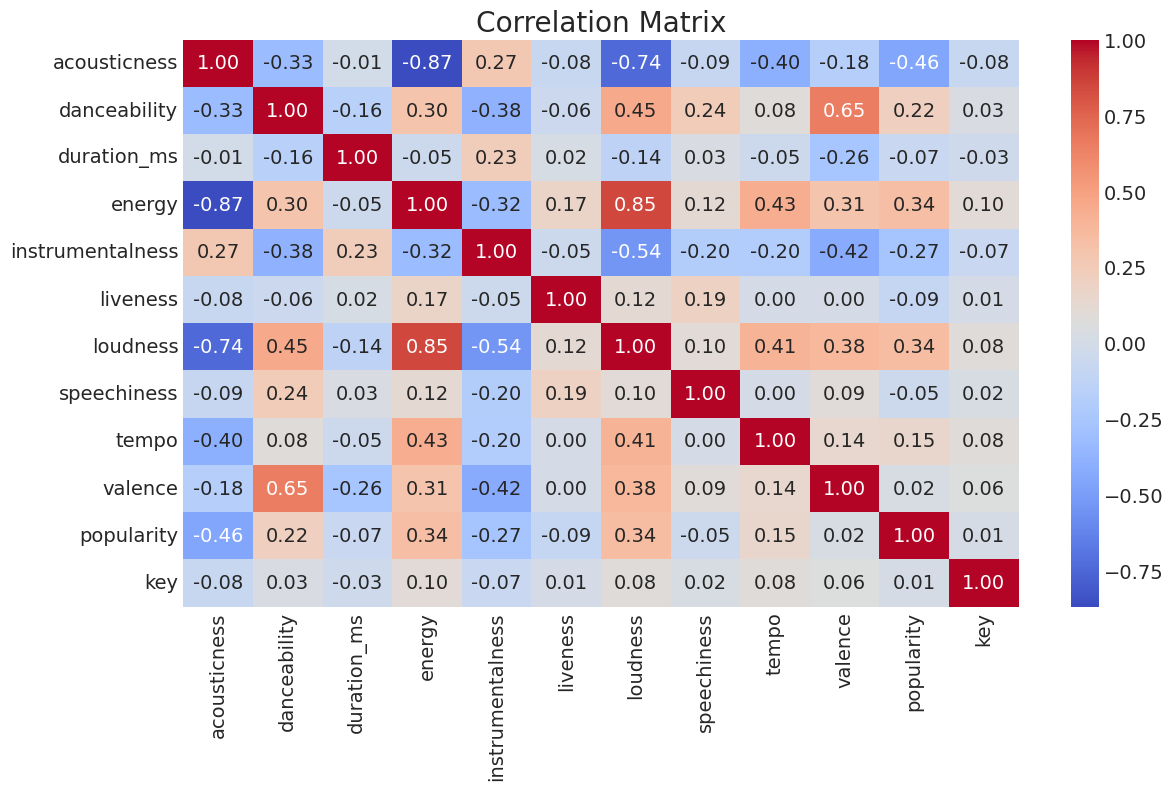

In [6]:
numeric_df = df.select_dtypes(include=['int64', 'float64']) # To Select only numerical columns for correlation
corr = numeric_df.corr()['popularity'].sort_values(ascending=False) # Calculating correlation to see what factors affect the popularity of the song
top_factors = corr.drop('popularity').head(2)
print(top_factors)

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [7]:
corr = corr.drop('popularity')
top_factors = corr.reindex(corr.abs().sort_values(ascending=False).index).head(3)
print(top_factors)


for factor, value in top_factors.items():
    print(f"\nFactor: {factor}")
    print(f"Correlation: {value:.3f}")
    if value > 0:
        print(" As this feature increases, song popularity tends to increase.")
    else:
        print(" As this feature increases, song popularity tends to decrease.")

acousticness   -0.458546
loudness        0.344315
energy          0.337657
Name: popularity, dtype: float64

Factor: acousticness
Correlation: -0.459
 As this feature increases, song popularity tends to decrease.

Factor: loudness
Correlation: 0.344
 As this feature increases, song popularity tends to increase.

Factor: energy
Correlation: 0.338
 As this feature increases, song popularity tends to increase.


**Answer for Q1**: The two biggest factors affecting a song's Popularity are Acousticness and Loudness. Acousticness has the strongest correlation with popularity, and it is a negative correlation of -0.46. This means that less acoustic songs tend to be more popular. while, songs that are highly acoustic tend to be less popular. Since the correlation is negative, when Acousticness increases, the song's Popularity decreases.
Loudness has the second strongest correlation with popularity and it is a positive correlation of 0.34. This means that louder songs tend to be more popular. Since the correlation is positive , when Loudness increases, the song's Popularity increases.

We thought a correlation matrix would be perfect to visualize this question because it directly shows the quantitative relationships between Popularity and all other audio features and the ammount of correlation between the features and their relationship. 1 is also the highest level of correlation.

**Q2: Which genre is the most popular and which is the least?**

**Visualization**

/tmp/ipython-input-129844914.py:6: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0, bottom5.values.max() * 1.3)# Increase y axis range by 20% above the max


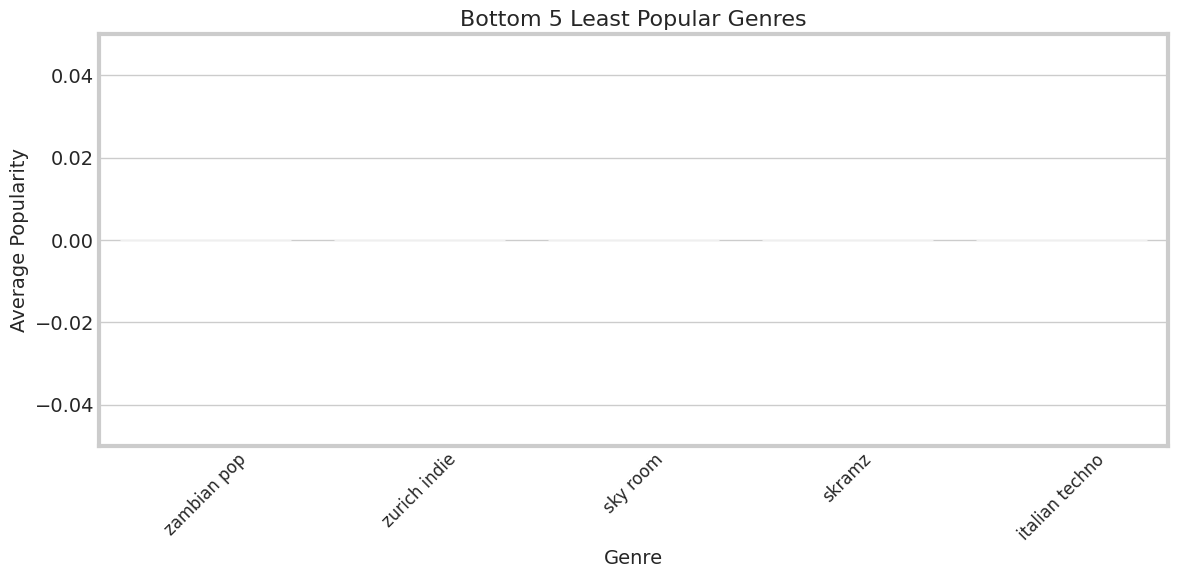

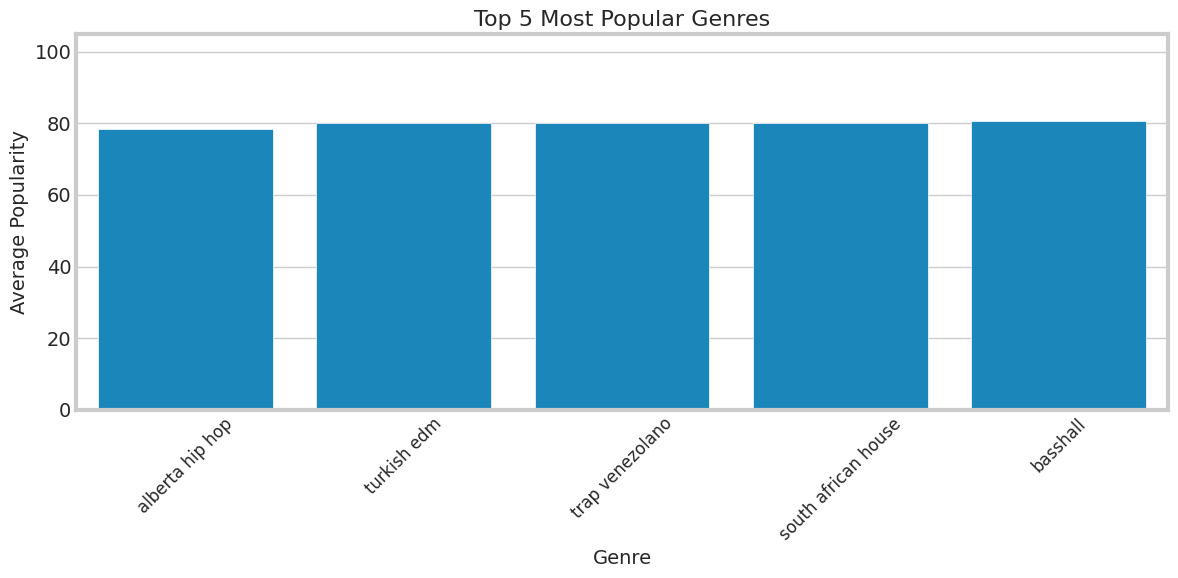

Bottom 5 Least Popular Genres:
genres
zambian pop       0.0
zurich indie      0.0
sky room          0.0
skramz            0.0
italian techno    0.0
Name: popularity, dtype: float64

Top 5 Most Popular Genres:
genres
alberta hip hop        78.500000
turkish edm            80.000000
trap venezolano        80.000000
south african house    80.000000
basshall               80.666667
Name: popularity, dtype: float64


In [8]:
genre_popularity = df.groupby("genres")["popularity"].mean().sort_values()# Compute average popularity per genre
bottom5 = genre_popularity.head(5) # getting bottom 5 Least popular Genres
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom5.index, y=bottom5.values, errorbar=None)

plt.ylim(0, bottom5.values.max() * 1.3)# Increase y axis range by 20% above the max

plt.title("Bottom 5 Least Popular Genres", fontsize=16)
plt.ylabel("Average Popularity", fontsize=14)
plt.xlabel("Genre", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

top5 = genre_popularity.tail(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top5.index, y=top5.values, errorbar=None)

plt.ylim(0, top5.values.max() * 1.3)
plt.title("Top 5 Most Popular Genres", fontsize=16)
plt.ylabel("Average Popularity", fontsize=14)
plt.xlabel("Genre", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

print("Bottom 5 Least Popular Genres:")
print(bottom5)

print("\nTop 5 Most Popular Genres:")
print(top5)


**Answer for Q3**: The most popular genre is basshall where average popularity is equal to 80.666667. Basshall, south african house, trap venezolano, turkish edm and alberta hip hop all have an average popularity score that is very high (around 80), indicating that music in these genres is extremely popular with listeners.

The five genres (zambian pop, zurich indie, sky room, skramz, and italian techno) all have an average popularity score that is zero. In the context of this data, this indicates that these genres are very niche.

We used a bar plot with the Genre on the X-axis and the Average Popularity on the Y-axis because it is the best type of graph to visualize the distribution of Popularity among the different Genres and figure out their ranking depending on their popularity

**Q3: What are the most correlated pairs of attributes? (Mention 2 pairs, with interpretation)**

**Visualization**

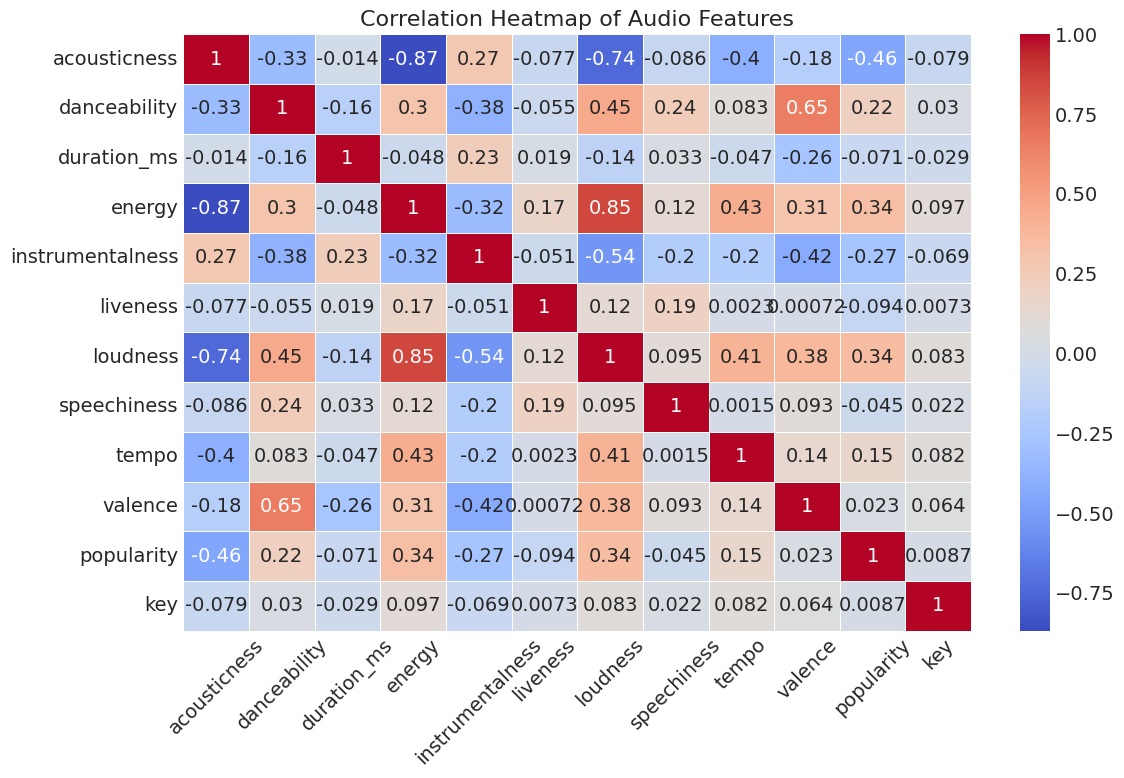

In [9]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

corr = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Audio Features", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Answer for Q3**: The most correlated pairs are Energy and Loudness and Acousticness and Energy.

Firstly, the correlation between Energy and Loudness was 0.85 and that is a strong positive correlation, meaning as the energy increases, the loudness tends to increase significantly as well.

Secondly, the correlation between for Energy and Loudness was -0.87 and that is a very strong negative correlation, meaning as the acousticness increases, the energy tends to decrease significantly.

We chose a correlation matrix to visualize this question because it directly says to look for the 2 most **correlated** pairs. A correlation matrix shows the quantitative relationships between all the audio features and the level of correlation between the features, 1 is also the highest level of correlation.

**Q4: Plot the frequency of words in genres. Which main genre categories have the most sub-genres? (mention at least 3)**

**Visualization**

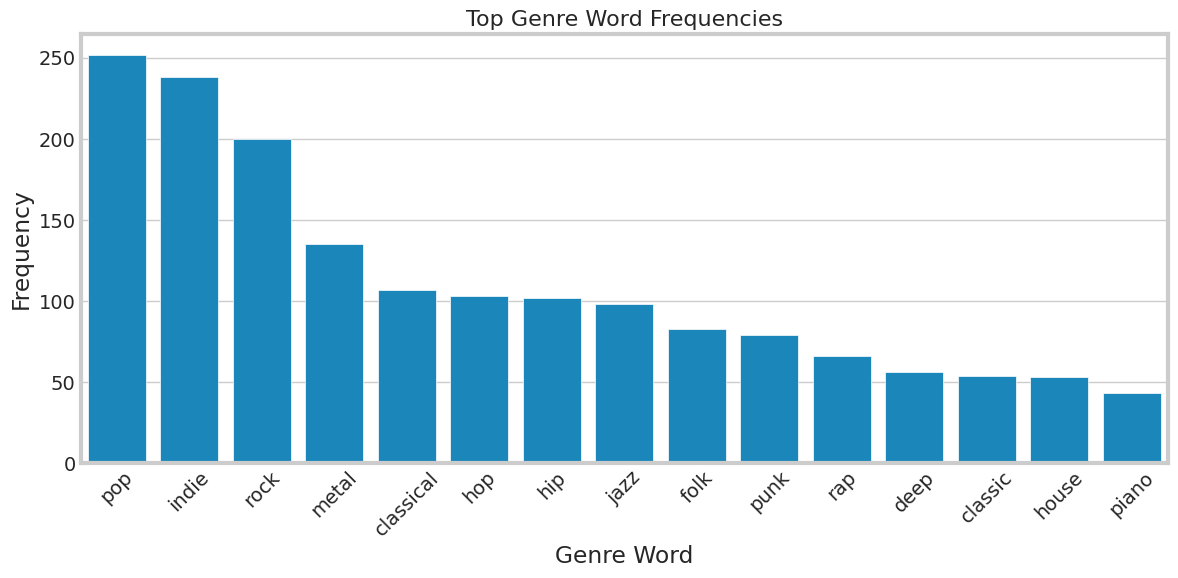

Top Genre Words:
          word  frequency
21         pop        252
47       indie        238
16        rock        200
48       metal        135
2    classical        107
11         hop        103
10         hip        102
111       jazz         98
71        folk         83
22        punk         79


In [10]:
import re
from collections import Counter

all_words = [] # Combining all genre words into a big list
for g in df["genres"].astype(str): # Converting to lowercase, removing symbols and spliting into words
    words = re.findall(r'\b\w+\b', g.lower())
    all_words.extend(words)
word_counts = Counter(all_words)#Counting the frequency of each word

word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'frequency'])# Converting to dataframe in order to plot
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=word_freq_df.head(15), x="word", y="frequency", errorbar=None)
plt.title("Top Genre Word Frequencies", fontsize=16)
plt.xticks(rotation=45)
plt.xlabel("Genre Word")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

print("Top Genre Words:")
print(word_freq_df.head(10))

**Answer for Q4**: Pop is the genre with the most sub-genres as its frequency is 252, Indie is the second highest genre with the most sub-genres with of frequency that is 238 and Rock is the third highest genre with the most sub-genres which is 200

We used a bar plot with the Genre word on the X-axis and the Frquency on the Y-axis because it is the best type of graph to visualize the distribution of frequencis among the different Genre words and figure out their ranking of using their frequency and figure out the main genre's categories that have the most sub-genres.

**Q5: Create an additional visualization that differs from earlier ones. Your visualization must highlight a new data
relationship or finding. Provide a short explanation of the insight and its relevance**

**Visualization**

<Figure size 1400x800 with 0 Axes>

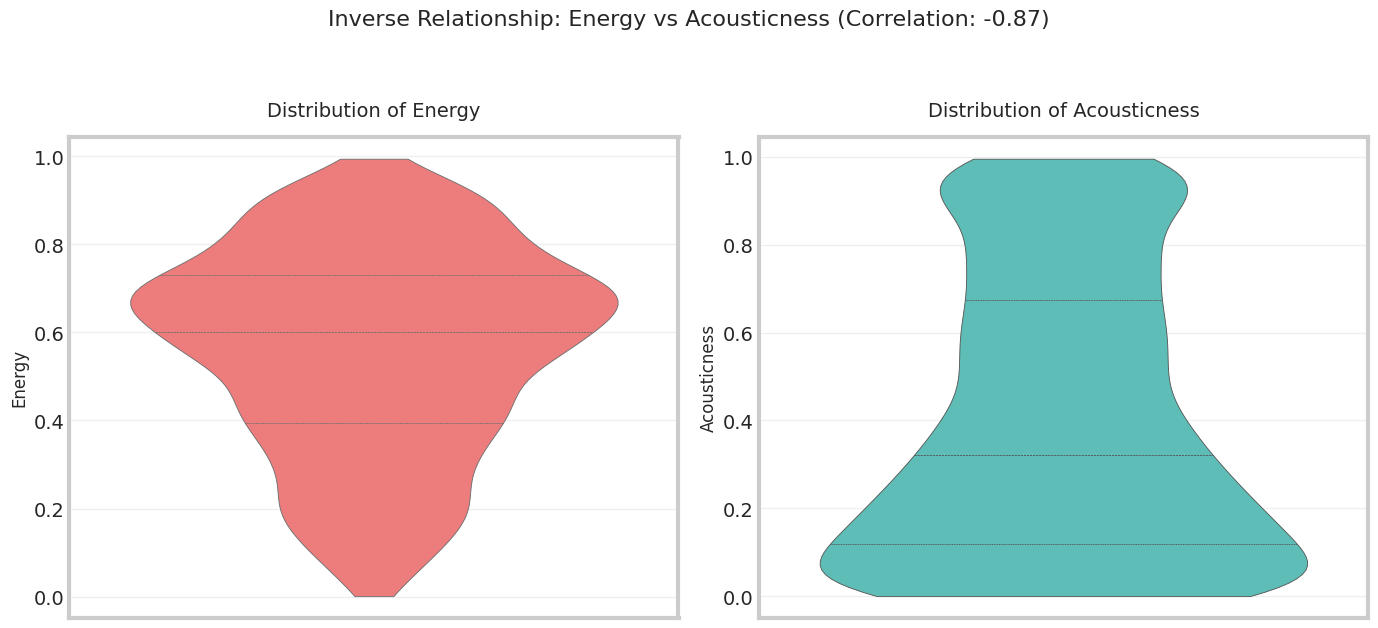

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.violinplot(y='energy', data=df, ax=axes[0],
               color='#FF6B6B', inner='quartile', cut=0)
axes[0].set_title('Distribution of Energy', fontsize=14, pad=15)
axes[0].set_ylabel('Energy', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

sns.violinplot(y='acousticness', data=df, ax=axes[1],
               color='#4ECDC4', inner='quartile', cut=0)
axes[1].set_title('Distribution of Acousticness', fontsize=14, pad=15)
axes[1].set_ylabel('Acousticness', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

plt.suptitle('Inverse Relationship: Energy vs Acousticness (Correlation: -0.87)',
             fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

**Answer for Q5**:
We saw in the heatmap that the correlation between Energy and Acousticness was -0.87 which we found really intersting since it is in negative meaning that the 2 attributes are highly unrelated.


The violin plot shows a strong inverse relationship between Energy and Acousticness (correlation: -0.87) by their contrasting distribution shapes.


Energy shows a right-skewed distribution with most tracks concentrated at higher energy levels (thicker section on the right) mainly between 0.6 and 0.8, while Acousticness shows a left-skewed distribution with most tracks clustered at lower acoustic values maily between 0 and 0.2. Those 2 graphs clearly shows that the tracks are rarely both highly energetic and highly acoustic simultaneously.


We used 2 violin graphs to show the full distribution patterns (not just averages) unlike a scatterplot (which shows individual points) or a bar chart (which shows only means) and help us visualize the Skewness and multimodality and the inverse realtionship side by side.

##Normalization

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols_to_normalize = ['acousticness'	,'danceability' ,	'duration_ms'	, 'energy',	'instrumentalness',	'liveness' ,	'loudness',	'speechiness'	,'tempo',	'valence'	,'popularity']

df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

df.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,21st century classical,1.808342,-2.484320,-0.965911,-2.089264,1.479319,1.827840,-3.912215,-0.534445,-2.500701,-1.927254,-0.722139,6
1,432hz,0.292822,-1.578684,8.421635,-0.471323,0.996498,-0.669062,-1.181715,-0.084032,0.072407,-1.342738,0.750932,5
2,8-bit,1.128597,1.160236,-1.442591,1.095268,2.486190,-0.723202,0.247574,-0.454509,0.825654,2.389557,0.482196,7
3,a cappella,0.861361,0.011756,-0.645480,-1.043864,-0.779432,-0.222369,-0.366940,-0.009049,-0.395587,-0.220455,0.352012,7
4,abstract,0.181571,-0.139535,0.966332,-0.506559,2.387685,-0.809102,-0.924332,-0.460515,0.507473,-0.918720,0.213460,1


We normalized our numeric data (which were genres	acousticness, danceability,	duration_ms,	energy,	instrumentalness,	liveness,	loudness,	speechiness,	tempo,	valence,	popularity,	key) to ensures that all features contribute equally, leading to clusters that better reflect the overall structure of the data, so this makes normalization a crucial preprocessing step when features have varying scales, ensuring more meaningful and interpretable clustering results.
We also normalized our data because they are not similar in range.

In [13]:
X = df[cols_to_normalize].copy()
X.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,1.808342,-2.484320,-0.965911,-2.089264,1.479319,1.827840,-3.912215,-0.534445,-2.500701,-1.927254,-0.722139
1,0.292822,-1.578684,8.421635,-0.471323,0.996498,-0.669062,-1.181715,-0.084032,0.072407,-1.342738,0.750932
2,1.128597,1.160236,-1.442591,1.095268,2.486190,-0.723202,0.247574,-0.454509,0.825654,2.389557,0.482196
3,0.861361,0.011756,-0.645480,-1.043864,-0.779432,-0.222369,-0.366940,-0.009049,-0.395587,-0.220455,0.352012
4,0.181571,-0.139535,0.966332,-0.506559,2.387685,-0.809102,-0.924332,-0.460515,0.507473,-0.918720,0.213460


We copied all of the normalized attributes into a new table called X to be used in clustering.

##Choosing number of clusters

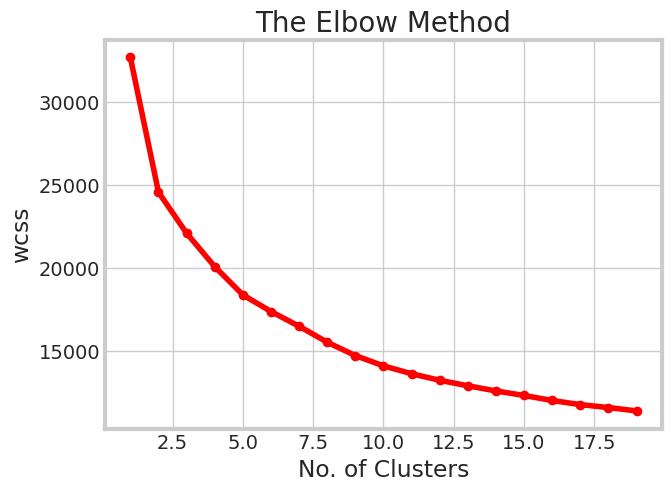

In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

plt.plot(range(1,20), wcss, marker='o', color='red')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

Choosing the optimal number of clusters (k) in K-Means clustering is a crucial step as it significantly impacts the quality and interpretability of the results.

The elbow method is one heuristic for choosing k or the number of clusters the K-Means algorithm should form. At a certain point, increasing the number of clusters causes diminishing returns in clustering performance beacuse the clusters are already well-grouped. So, the number of clusters at which the curve bends, i.e. its 'elbow point', is chosen and in our case that is 10.

WWCSS stands for within cluster sum of square:
*   30000 to 15000: This measures how compact the clusters are
*   Lower WCSS= Tighter, more compact clusters (points are close to their centroids)
*   Higher WCSS = More spread out, less compact clusters

We chose 10 (the "elbow") because the points before it contain big improvements in compactness and change. while the points after it contain Small improvements (not worth the complexity) as the line starts to flatten

We tried a lot of ranges like (1, 40), (1, 35), (1, 27), (1, 20), (1, 15) and kept going down until we landed on (1, 20) with a k=10.

##Clustering

In [15]:
km = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(X)

# Get the cluster labels for the fitted data
labels = km.labels_
labels

array([2, 5, 0, ..., 0, 1, 0], dtype=int32)

After deciding which k to use (number of clusters, which is 10), we can apply the K-Means algorithm to our data to cluster them into k (10) groups.

**Display a random sample of at least 5 genres from each cluster group**

In [16]:
import pandas as pd

df['cluster'] = labels

pd.DataFrame({
    f'Cluster {c}': df[df['cluster'] == c]['genres'].sample(5).tolist()
    for c in sorted(df['cluster'].unique())
})

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9
0,marathi pop,audiophile vocal,world meditation,hurdy-gurdy,reggaeton,musique pour enfants,art pop,new comedy,deep dnb,khaleeji iraqi
1,baton rouge indie,classic turkish pop,viola,icelandic electronic,hip hop cubano,432hz,folktronica,comedy,skate punk,environmental
2,finnish soul,jazz guitar,mallet,bristol indie,uk hip hop,bulgarian experimental,new weird america,gospel italiano,breakbeat,spa
3,texas blues,detskie pesni,native american flute,eastern bloc groove,indie electropop,histoire pour enfants,indie folk,ghanaian traditional,chicago hardcore,neo-traditional country
4,ska,samba de roda,boy soprano,deep soul house,soca,oratory,indie pop,hoerspiel,southern metal,gujarati garba


We chose a simple table for this as a method of visualization because exact information was required, not trends or distribustions. Specific and direct data points are needed to be displayed and no interpretations or relationships were needed. Also a table is easy to read and understand and is an efective and compact way to showcase simple data.

##Cluster Interpretation

To better understand each cluster's main distinguishing features, we will look at the statistics for each cluster or plot them visually using boxplots, scatterplots and pairplots.

In [17]:
# We'll assign the cluster labels to a new column called 'cluster' in our original dataframe
df['cluster'] = labels

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df.groupby('cluster').describe()

#We created a new column in the table called cluster

acousticness                                                    \
               count      mean       std       min       25%       50%   
cluster                                                                  
0              612.0 -0.361892  0.563383 -1.253767 -0.790859 -0.415706   
1              367.0  1.235422  0.421577 -0.386522  0.929105  1.241974   
2              343.0  1.487623  0.405037 -1.002392  1.338328  1.619640   
3              241.0 -0.749540  0.535225 -1.254675 -1.232507 -0.909027   
4              300.0 -0.656226  0.382440 -1.250117 -0.898268 -0.710780   
5                6.0  1.228046  0.574504  0.292822  0.947192  1.381937   
6              454.0  0.321819  0.576403 -1.240890 -0.090450  0.324464   
7               20.0  0.964312  0.572150 -0.028664  0.709342  1.075491   
8              568.0 -0.954764  0.330604 -1.254672 -1.209759 -1.049405   
9               61.0  0.079933  1.059156 -1.254599 -0.844959 -0.075524   

                            danceability                                \
              75%       max        count      mean       std       min   
cluster                                                                  
0        0.010991  1.266214        612.0  0.785283  0.561384 -0.763469   
1        1.609210  1.855466        367.0 -0.079226  0.647017 -2.596377   
2        1.792310  1.860470        343.0 -1.416073  0.643271 -3.187745   
3       -0.460565  1.150490        241.0 -0.094135  1.091245 -2.589187   
4       -0.481241  1.344405        300.0  1.185697  0.467397 -0.565417   
5        1.600874  1.835449          6.0 -1.289287  1.179104 -2.702350   
6        0.706784  1.832321        454.0 -0.025956  0.553477 -1.720276   
7        1.407995  1.815119         20.0  0.462256  0.391643 -0.419400   
8       -0.824890  0.906532        568.0 -0.478767  0.653946 -2.496820   
9        1.152575  1.820071         61.0 -0.272330  1.302530 -2.980136   

                                                duration_ms             \
              25%       50%       75%       max       count       mean   
cluster                                                                  
0        0.358664  0.781422  1.178889  2.457130       612.0  -0.134468   
1       -0.433799 -0.022364  0.350507  1.671294       367.0  -0.429500   
2       -1.790082 -1.435544 -1.056564  0.695637       343.0   0.341823   
3       -0.846001 -0.014535  0.575286  2.295184       241.0   0.705384   
4        0.910924  1.179644  1.431802  2.600492       300.0  -0.229445   
5       -2.345687 -1.002361 -0.426037 -0.001261         6.0  13.809728   
6       -0.349866 -0.001290  0.271267  1.943417       454.0  -0.121353   
7        0.219809  0.396966  0.791552  1.120413        20.0   0.506393   
8       -0.873628 -0.412906 -0.057336  1.089440       568.0  -0.096109   
9       -1.235766 -0.059225  0.778601  2.421290        61.0   0.626377   

                                                                         \
              std       min        25%        50%        75%        max   
cluster                                                                   
0        0.551612 -2.332453  -0.466121  -0.182055   0.134307   2.753890   
1        0.662831 -2.207084  -0.814396  -0.558350  -0.222923   3.529465   
2        1.015787 -1.896761  -0.370607   0.250953   1.002295   4.129108   
3        0.906475 -1.123314   0.192603   0.526867   1.106666   4.908497   
4        0.466120 -1.723069  -0.501141  -0.251193   0.008353   1.996456   
5        4.903658  8.421635  10.797953  13.669617  14.476309  22.511562   
6        0.530066 -1.730126  -0.436903  -0.160304   0.112307   2.121147   
7        1.883375 -1.921841  -0.621866   0.005514   1.064911   5.089242   
8        0.496596 -1.695548  -0.399621  -0.132338   0.178712   1.763047   
9        1.388687 -1.398114  -0.545968   0.426865   1.650814   3.942750   

        energy                                                              \
         count      mean       std       min       25%       50% 

In [18]:
df.groupby('cluster').describe(include='object')

#This shows the count, unique values, top value and frequency of each cluster

genres                            
         count unique             top freq
cluster                                   
0          612    612          zydeco    1
1          367    367    zurich indie    1
2          343    343            yoik    1
3          241    241        abstract    1
4          300    300    zimdancehall    1
5            6      6           432hz    1
6          454    454  yorkshire folk    1
7           20     20    black comedy    1
8          568    568   zhongguo feng    1
9           61     61  arabic hip hop    1

/tmp/ipython-input-3402215385.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, palette=sns.color_palette('hls', 9), data=df)
/tmp/ipython-input-3402215385.py:7: UserWarning: 
The palette list has fewer values (9) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='cluster', y=col, palette=sns.color_palette('hls', 9), data=df)
/tmp/ipython-input-3402215385.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, palette=sns.color_palette('hls', 9), data=df)
/tmp/ipython-input-3402215385.py:7: UserWarning: 
The palette list has fewer values (9) than needed (10) and will cycle, which may produce an uninterpretable 

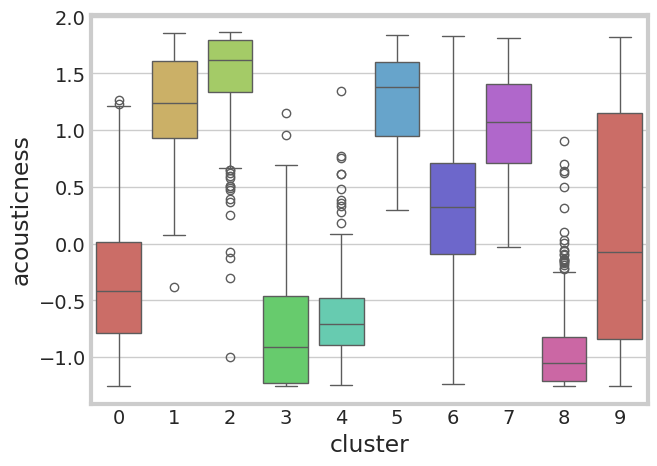

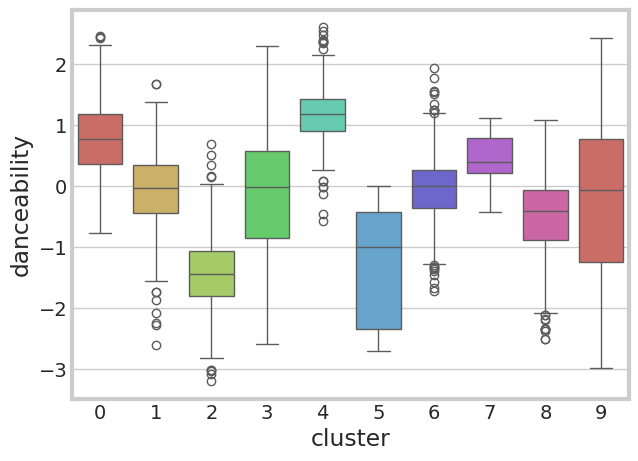

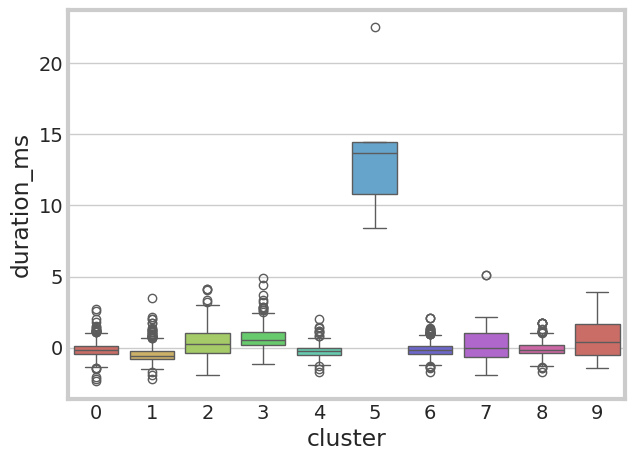

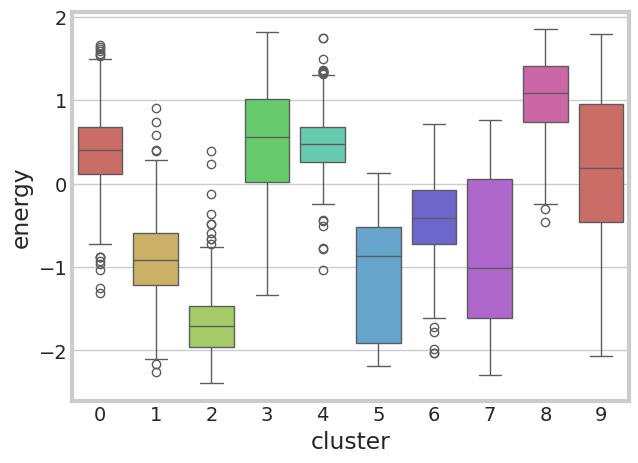

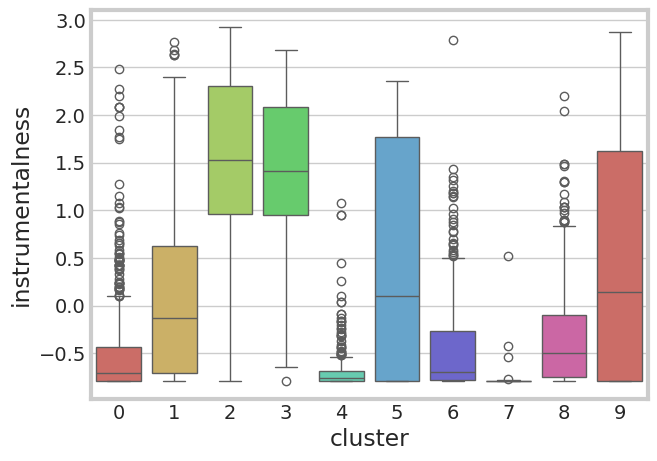

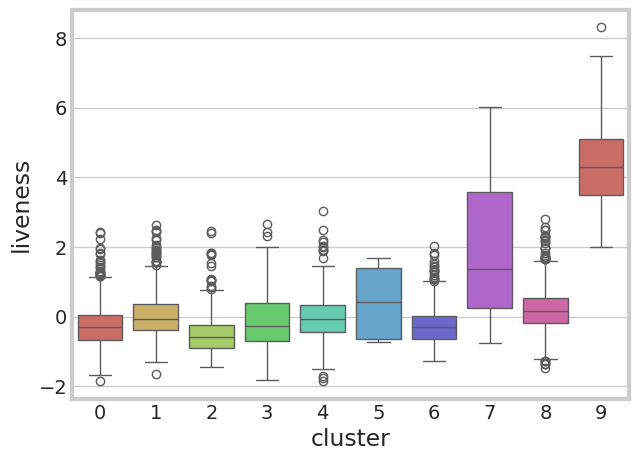

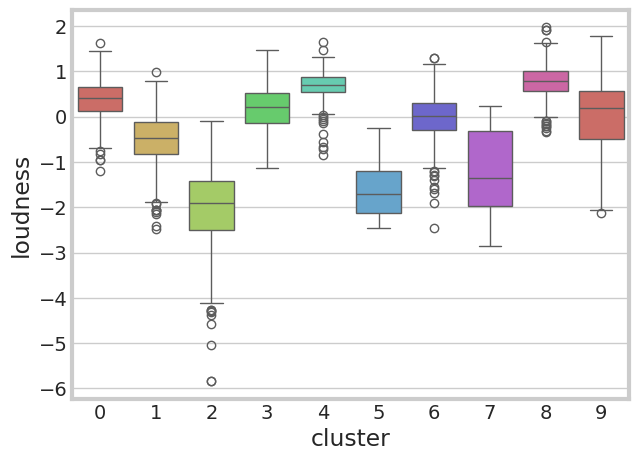

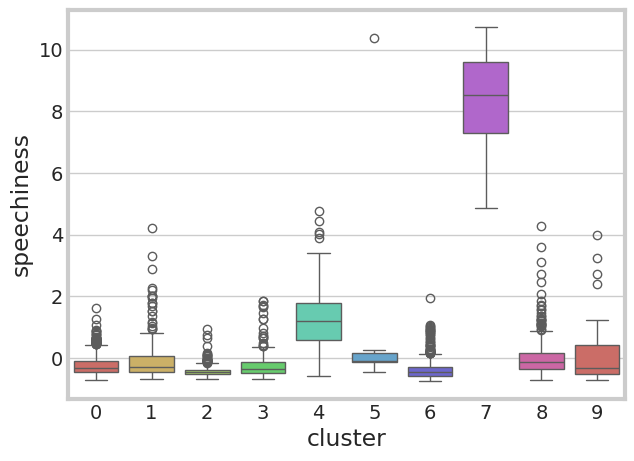

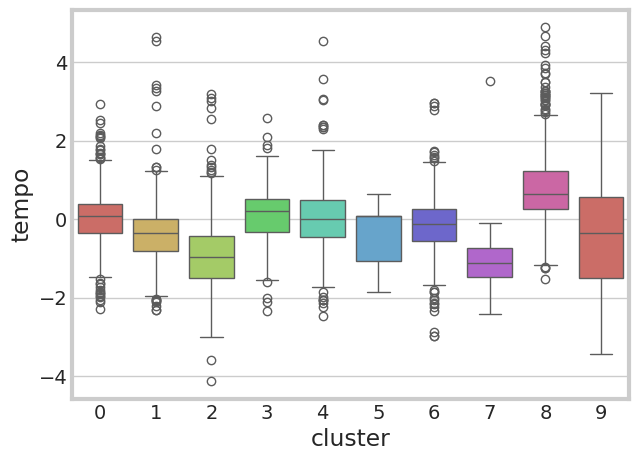

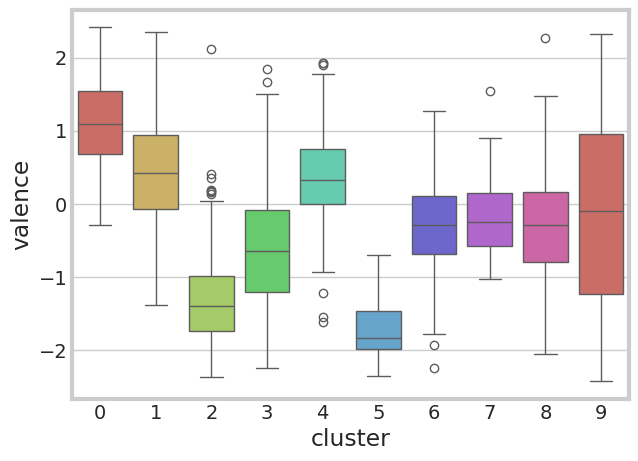

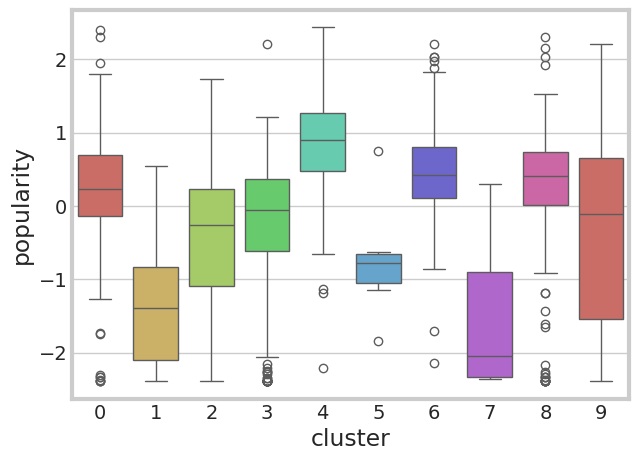

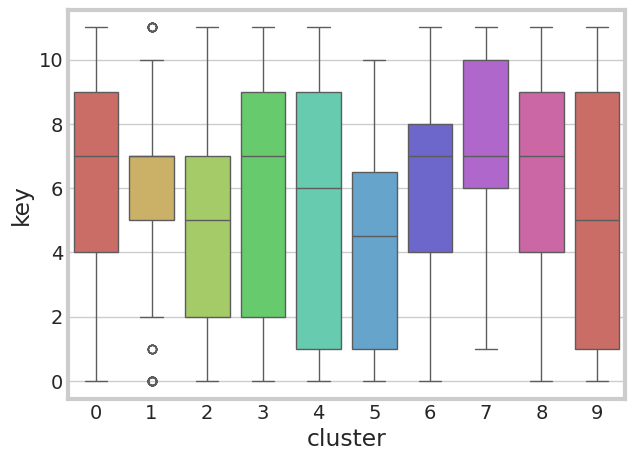

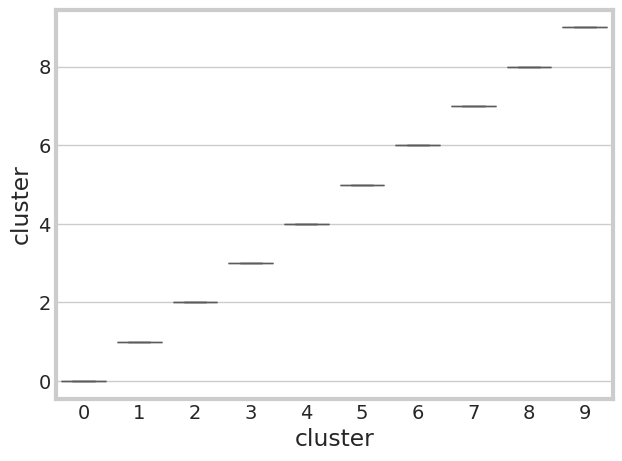

In [19]:
# Minimal code to plot a boxplot of each numerical column
# Categorical columns would need to be plotted differently
# (e.g. using a countplot)

for col in df.select_dtypes('number').columns:
    plt.figure()
    sns.boxplot(x='cluster', y=col, palette=sns.color_palette('hls', 9), data=df)

Our data is highly dimensional and can not be plotted simply on a single plot. So we decided to plot each cluster with respect to each numerical column in the data using boxplots.

First (Acousticness), our box plots have a wide range of data distributed among the clusters, we noticed that cluster 2/4/8 have a lot of outliers that do not fit in the boxes and fall outside of them, for 2 all the outliers are below the lower quartile, while all the outliers for 4/8 are above the upper quartile. We also noticed that cluster 9 on the graph contains a very big range compared to the other clusters from around -0.20 until 1.15.

Second (Danceability), also in this there is a a wide range of data distributed among the clusters, we noticed that cluster 1/2/4/6/8 have a lot of outliers that do not fit in the boxes and fall outside of them, 2/4/6 have outliers both above and bellow but 8 has only bellow. We also noticed that cluster 5 on the graph contains a very big range compared to the other clusters from around -0.4 until -2.7, followed by cluster 9 on the graph as the range itss from around 2.3 until -3.

Third (Duration_ms), all clusters are very low ranging between 0 to 5 with an exception for cluster 5 on the graph. Cluster 6 is quite high compared to the other clusters and has only 1 outlier at the very top.

Fourth (Energy), this graph contains a wide range of data distribution among the clusters, we noticed that the range of clusters 5/7/9 are larger than the ranges for the rest of the clusters as the ranges of the rest of the clusters are much smaller. They also contained no outliers unlike clusters 0/1/2/4 which contained a lot of outliers (the rest of the clusters also contained outliers but those contained the most outliers out of all of them)

Fifth (Insturmentalness), cluster 7 is almost invisible as it contains a very small range of data, followed by cluster 4 which is also very small and contains a lot of outliers. clusters 0 and 6 also contain a lot of outliers compared to the rest of the boc plots. clusters 5 and 9 are much larger than the rest of the clusters but both of them start at around -0.25 with cluster 5 ending at around 1.75, making it a little bit bigger than cluster  9 which ends at around 1.6. Clusters 2 and 3 are also much higher than the rest of the clusters.

Sixth (Liveness), all the clusters are around the same range and size excet for clusters 5/7/9. cluster 5's box plot is a bit bigger than the rest of the clusters as it has a bigger range but the box plot of cluster 7 is bigger that cluster 5's and also its a bit higher. Cluster 9 has a much higher starting point of 2 while all the other box plots have a starting point in the negative.

Seventh (Loudness), all the clusters are quite small in size (and range) except for cluster 2 with a starting point of around -4.05 and an ending point of almost zero, making it the cluster with the wdest range. All the clusters contain outliers except for clusters 3/5. Cluster 7 had the biggest box plot starting at almost -3 and ending at around 0.2.

Eighth (Speechiness), all the clusters are around the same range and size except for clusters 4/7. all the clusters also contain a lot of outliers except for cluster 7. Cluster 4 has the same sarting point as the rest of the clusters of around -0.15 but it is bigger in size (and range) and has a much higher ending point of around 3.5, while cluster 7 has a much higher staring point of around 4.9 and is bigger in size too.

Ninth (Tempo), the clusters are all around the same range with cluster 0 and 8 having a lot of outliers compared to the rest of the clusters. Cluster 9 a little bigger in size (and range) than the rest of the clusters with a starting point of around -3.5 and an end point of around 3.5 making this cluster having the biggest range out of all clusters.

Tenth (Valency),the clusters all have a wide and variaty and the majority of them do nothave a lot of outliers. However, cluster 9 is larger in size (and range) than the other clusters with a staring point of around -2.8 and an end point of around 2.5 making it the cluster with the largest range out of all the clusters.

Eleventh (Popularity), the clusters are distributed on a wide range and varity with some clusters being bigger than the others. cluster 9 is larger in size (and range) than the other clusters with a staring point of around -2.8 and an end point of around 2.5 making it the cluster with the largest range out of all the clusters. Cluster 5 is the smallest cluster with a starting point of around -1.1 and and end point of around -1.4, making it the cluster with the smallest range.

Twelfth (Key), key is the attribute with the clusters with the widest range and sizes, all the clusters are close in size but compared to the sizes of the box plots in the other graphs it is quite large. The majority of the clusters have a starting point of zero unlike the previous box plots were a lot of them started with a negative point. Cluster 1 is noticibly smaller than the restof the clusters and it is the only one containing outliers that are higher and lower than its range, it has a starting point of 2, making it one of the 2 clusters than do not start at a zero and has an ending point of 10, aking it one of the 2 clusters that do not end around 11.

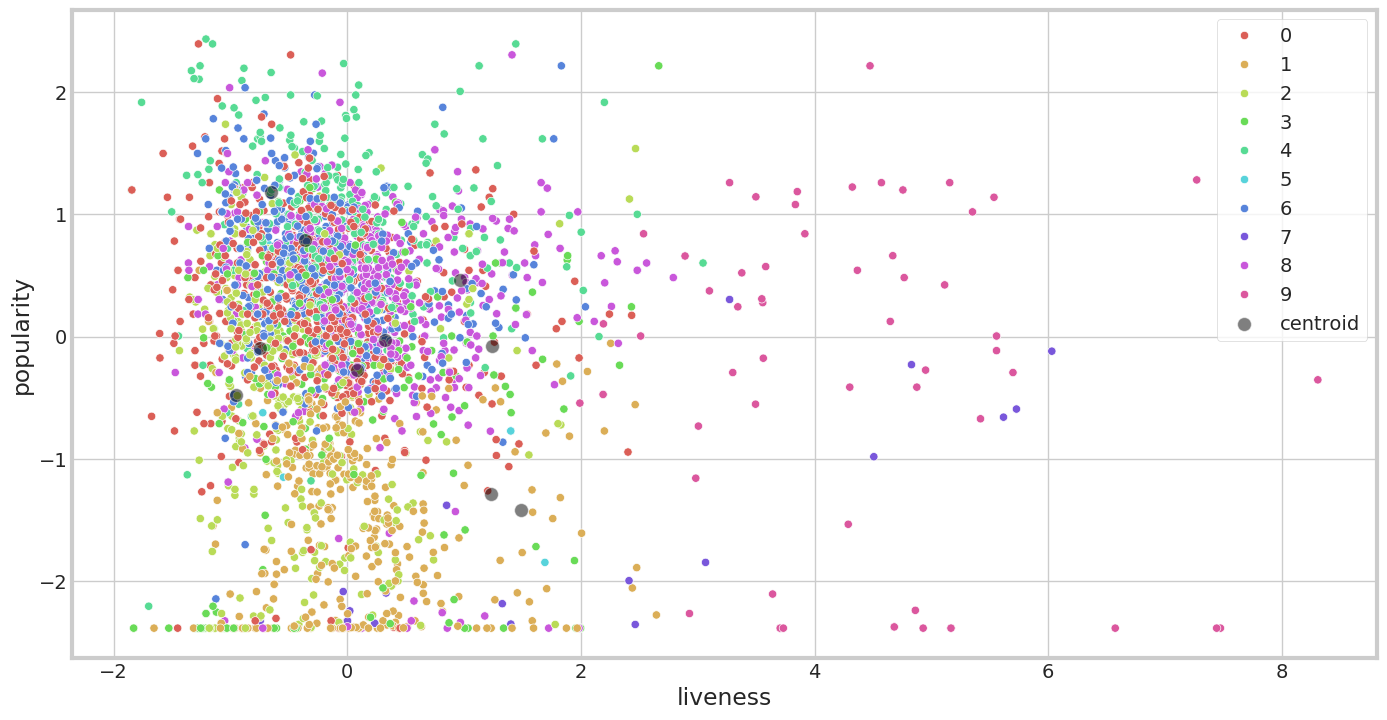

In [20]:
# Since we only have two columns, we can easily plot/represent the clusters on a single scatterplot
# If we had more columns, we can consider using seaborn's pairplot (to a pair-wise scatterplot of every column)
# Or a box/violin plot, to look at the data distribution of each cluster with respect within each column/feature
plt.figure(figsize=(15,8))
sns.scatterplot(x='liveness', y='popularity', hue='cluster', data=df, palette=sns.color_palette('hls', 10));

# Since we're dealing with just two columns, we'll also add the centroids
# to the plot to visually demonstrate the algorithm's cluster centers
centroids = km.cluster_centers_
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], label='centroid', color='black', alpha=0.5, s=100);

As we chose a scatter to show the distribution of data between liveness and popularity and where the centroids of the clusters fall near the data. There are 10 cetroids since each cluster must have a cetroid. We noticed that most of the data fall within the range of -2 and 2 (with the precense of some outliers) so thats why all the cetroids fall within those ranges. Also our cetroids are distributed almost in pairs as you can see there are always 2 near each other.

In [21]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.1607


\Silhouette Score measures how similar each data point is to its iwn cluster compared to other clusters, it ranges from 1 to -1. 1 is perfect clustereing where points are very similar within clusters, very different between clusters. 0 is Overlapping clusters where clusters aren't well separated. -1 is when points are assigned to the wrong clusters.

We got a 0.1607 wheich might indicate that our k (10) is not the optimal count of clusters for our data and that our clusters are not well separated and they overlap. Our points are close to other clusters while also being close to their own cluster. Still our score is above 0 so it has some structure.

##Bonus

In [22]:
import random

def genre_recommender(input_genre):

    if input_genre not in df['genres'].values:
        return f"'{input_genre}' not found"

    input_cluster = df[df['genres'] == input_genre]['cluster'].iloc[0]
    cluster_genres = df[df['cluster'] == input_cluster]['genres'].tolist()

    cluster_genres.remove(input_genre)

    if len(cluster_genres) >= 5:
        return random.sample(cluster_genres, 5)
    else:
        return cluster_genres

print(genre_recommender('jazz'))

['accordion', 'classic czech pop', 'greek guitar', 'kashmiri pop', 'ryukyu ongaku']


Here we find the cluster where the inputed genre is located in then we get all the genres in that cluster and we add them into a list. We then remove the inputed genre from the list and return a random sample of five genres located in that very same cluster (from our list). If the genre inputed is not in our data then an error message (input + "not found") is outputed to the user.